In [2]:
import hatchet as ht
import sys
import glob
import re 

import matplotlib.pyplot as plt
import pandas as pd
from hatchet.util.timer import Timer

datasets = glob.glob('data/lulesh-scaling' + '/lulesh*.json')
datasets.sort()

dataframes = []

for dataset in datasets:
    gf = ht.GraphFrame.from_caliper_json(dataset)
    gf.drop_index_levels()
    
    num_pes = re.match('(.*)-(\d+)(.*)', dataset).group(2)
    gf.dataframe['pes'] = num_pes
    filtered_gf = gf.filter(lambda x: x['time'] > 1e6)
    
    dataframes.append(filtered_gf.dataframe)

name,CalcEnergyForElems,CalcFBHourglassForceForElems,CalcHourglassControlForElems,CalcKinematicsForElems,CalcMonotonicQGradientsForElems,CalcMonotonicQRegionForElems,CalcPressureForElems,EvalEOSForElems,IntegrateStressForElems,LagrangeNodal,MPI_Allreduce,MPI_Waitall
pes,,,,,,,,,,,,
1,1.823877e+06,3.832556e+06,8.523384e+06,3.160618e+06,1.379143e+06,NaN,1.512447e+06,1.723555e+06,3.127526e+06,NaN,NaN,NaN
125,1.557270e+06,4.825786e+06,1.323489e+07,4.026723e+06,1.792632e+06,1.505643e+06,1.287188e+06,2.354075e+06,3.972232e+06,1.604264e+06,1.013293e+07,2.280841e+06
216,1.456985e+06,4.803558e+06,1.251766e+07,4.016008e+06,1.776111e+06,1.386444e+06,1.139403e+06,1.896678e+06,3.971922e+06,1.358336e+06,1.095802e+07,2.587627e+06
27,1.450120e+06,4.819865e+06,1.244421e+07,4.012263e+06,1.773992e+06,1.350483e+06,1.135885e+06,1.718796e+06,3.970243e+06,1.159244e+06,8.744689e+06,3.802305e+06
343,1.497534e+06,4.813910e+06,1.323930e+07,4.026464e+06,1.792983e+06,1.503682e+06,1.243019e+06,2.234088e+06,3.974869e+06,1.572751e+06,1.132277e+07,2.463886e+06
512,1.561684e+06,4.832240e+06,1.331161e+07,4.029242e+06,1.793327e+06,1.482072e+06,1.226399e+06,2.200562e+06,3.973302e+06,1.629329e+06,1.081706e+07,2.630376e+06
64,1.532278e+06,4.824476e+06,1.323898e+07,4.024272e+06,1.789463e+06,1.460710e+06,1.202447e+06,2.142427e+06,3.974533e+06,1.456277e+06,8.372375e+06,2.882935e+06
8,1.413954e+06,4.414364e+06,9.631492e+06,3.708370e+06,1.622015e+06,1.087375e+06,1.078904e+06,1.399583e+06,3.656287e+06,NaN,6.085400e+06,6.668590e+06


/opt/local/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:8: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  


Text(0, 0.5, 'Time (us)')

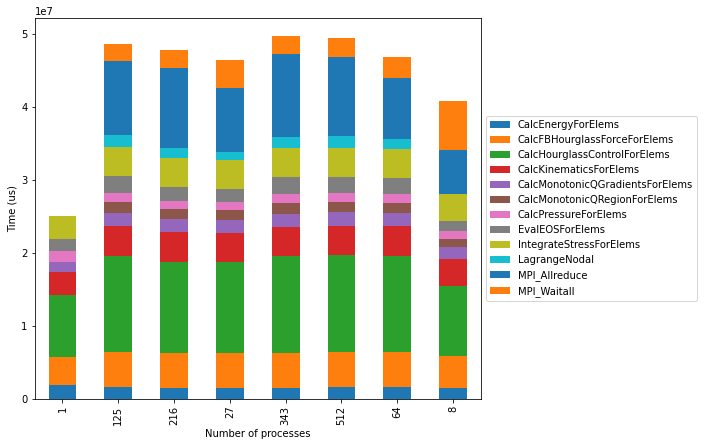

In [5]:
result = pd.concat(dataframes)

pivot_df = result.pivot(index='pes', columns='name', values='time')
display(pivot_df)

pivot_df.loc[:,:].plot.bar(stacked=True, figsize=(10,7))

ax = plt.subplot(111)

# Shrink current axis by 20%
box = ax.get_position()
ax.set_position([box.x0, box.y0, box.width * 0.8, box.height])

# Put a legend to the right of the current axis
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))

plt.xlabel('Number of processes')
plt.ylabel('Time (us)')